In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from collections import Counter
import spacy
nlp = spacy.load('en')

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]


NAME_POLITICIAN = "politician"
NAME_NEWSAGENCY = "news agency"
NAME_SPORTSTAR = "sports star"

NAME_CLUSTER_0  = "C0_Fan_Page"
NAME_CLUSTER_1 = "C1_Ordinary_User"
NAME_CLUSTER_2 = "C2_Botlike"

LIST_CLUSTERS = ['C0_Fan_Page', 'C1_Ordinary_User', 'C2_Botlike' ]

LIST_CATEGORIES = ['Politician', 'News agency', 'Sports star' ]

LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# define colors

COLOR_POLITICIAN = '#3e80f0'
COLOR_NEWSAGENCY = '#32a840'
COLOR_SPORTSARTS = '#f56d25'


COLOR_C0 = '#446fc4'
COLOR_C1 = '#7f2d9b'
COLOR_C2 = '#369b4f'


COLORS_COMMUNITIES = [ COLOR_POLITICIAN,
              COLOR_NEWSAGENCY,
              COLOR_SPORTSARTS
                 ]

COLORS_CLUSTERS = [ COLOR_C0,
              COLOR_C1,
              COLOR_C2
                 ]

# Load Clustered Data

In [4]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [5]:
df_c0_comment_trump = pd.read_csv('DataFrames/df_c0_comment_trump.csv')
df_c0_comment_obama = pd.read_csv('DataFrames/df_c0_comment_obama.csv')
df_c0_comment_macron = pd.read_csv('DataFrames/df_c0_comment_macron.csv')
df_c0_comment_may = pd.read_csv('DataFrames/df_c0_comment_may.csv')

df_c0_comment_bbc = pd.read_csv('DataFrames/df_c0_comment_bbc.csv')
df_c0_comment_cnn = pd.read_csv('DataFrames/df_c0_comment_cnn.csv')
df_c0_comment_foxnews = pd.read_csv('DataFrames/df_c0_comment_foxnews.csv')
df_c0_comment_reuters = pd.read_csv('DataFrames/df_c0_comment_reuters.csv')

df_c0_comment_messi = pd.read_csv('DataFrames/df_c0_comment_messi.csv')
df_c0_comment_ronaldo = pd.read_csv('DataFrames/df_c0_comment_ronaldo.csv')
df_c0_comment_nadal = pd.read_csv('DataFrames/df_c0_comment_nadal.csv')
df_c0_comment_federer = pd.read_csv('DataFrames/df_c0_comment_federer.csv')


df_c0_like_trump = pd.read_csv('DataFrames/df_c0_like_trump.csv')
df_c0_like_obama = pd.read_csv('DataFrames/df_c0_like_obama.csv')
df_c0_like_macron = pd.read_csv('DataFrames/df_c0_like_macron.csv')
df_c0_like_may = pd.read_csv('DataFrames/df_c0_like_may.csv')

df_c0_like_bbc = pd.read_csv('DataFrames/df_c0_like_bbc.csv')
df_c0_like_cnn = pd.read_csv('DataFrames/df_c0_like_cnn.csv')
df_c0_like_foxnews = pd.read_csv('DataFrames/df_c0_like_foxnews.csv')
df_c0_like_reuters = pd.read_csv('DataFrames/df_c0_like_reuters.csv')

df_c0_like_messi = pd.read_csv('DataFrames/df_c0_like_messi.csv')
df_c0_like_ronaldo = pd.read_csv('DataFrames/df_c0_like_ronaldo.csv')
df_c0_like_nadal = pd.read_csv('DataFrames/df_c0_like_nadal.csv')
df_c0_like_federer = pd.read_csv('DataFrames/df_c0_like_federer.csv')

In [6]:
df_c1_comment_trump = pd.read_csv('DataFrames/df_c1_comment_trump.csv')
df_c1_comment_obama = pd.read_csv('DataFrames/df_c1_comment_obama.csv')
df_c1_comment_macron = pd.read_csv('DataFrames/df_c1_comment_macron.csv')
df_c1_comment_may = pd.read_csv('DataFrames/df_c1_comment_may.csv')

df_c1_comment_bbc = pd.read_csv('DataFrames/df_c1_comment_bbc.csv')
df_c1_comment_cnn = pd.read_csv('DataFrames/df_c1_comment_cnn.csv')
df_c1_comment_foxnews = pd.read_csv('DataFrames/df_c1_comment_foxnews.csv')
df_c1_comment_reuters = pd.read_csv('DataFrames/df_c1_comment_reuters.csv')

df_c1_comment_messi = pd.read_csv('DataFrames/df_c1_comment_messi.csv')
df_c1_comment_ronaldo = pd.read_csv('DataFrames/df_c1_comment_ronaldo.csv')
df_c1_comment_nadal = pd.read_csv('DataFrames/df_c1_comment_nadal.csv')
df_c1_comment_federer = pd.read_csv('DataFrames/df_c1_comment_federer.csv')


df_c1_like_trump = pd.read_csv('DataFrames/df_c1_like_trump.csv')
df_c1_like_obama = pd.read_csv('DataFrames/df_c1_like_obama.csv')
df_c1_like_macron = pd.read_csv('DataFrames/df_c1_like_macron.csv')
df_c1_like_may = pd.read_csv('DataFrames/df_c1_like_may.csv')

df_c1_like_bbc = pd.read_csv('DataFrames/df_c1_like_bbc.csv')
df_c1_like_cnn = pd.read_csv('DataFrames/df_c1_like_cnn.csv')
df_c1_like_foxnews = pd.read_csv('DataFrames/df_c1_like_foxnews.csv')
df_c1_like_reuters = pd.read_csv('DataFrames/df_c1_like_reuters.csv')

df_c1_like_messi = pd.read_csv('DataFrames/df_c1_like_messi.csv')
df_c1_like_ronaldo = pd.read_csv('DataFrames/df_c1_like_ronaldo.csv')
df_c1_like_nadal = pd.read_csv('DataFrames/df_c1_like_nadal.csv')
df_c1_like_federer = pd.read_csv('DataFrames/df_c1_like_federer.csv')

In [7]:
df_c2_comment_trump = pd.read_csv('DataFrames/df_c2_comment_trump.csv')
df_c2_comment_obama = pd.read_csv('DataFrames/df_c2_comment_obama.csv')
df_c2_comment_macron = pd.read_csv('DataFrames/df_c2_comment_macron.csv')
df_c2_comment_may = pd.read_csv('DataFrames/df_c2_comment_may.csv')

df_c2_comment_bbc = pd.read_csv('DataFrames/df_c2_comment_bbc.csv')
df_c2_comment_cnn = pd.read_csv('DataFrames/df_c2_comment_cnn.csv')
df_c2_comment_foxnews = pd.read_csv('DataFrames/df_c2_comment_foxnews.csv')
df_c2_comment_reuters = pd.read_csv('DataFrames/df_c2_comment_reuters.csv')

df_c2_comment_messi = pd.read_csv('DataFrames/df_c2_comment_messi.csv')
df_c2_comment_ronaldo = pd.read_csv('DataFrames/df_c2_comment_ronaldo.csv')
df_c2_comment_nadal = pd.read_csv('DataFrames/df_c2_comment_nadal.csv')
df_c2_comment_federer = pd.read_csv('DataFrames/df_c2_comment_federer.csv')


df_c2_like_trump = pd.read_csv('DataFrames/df_c2_like_trump.csv')
df_c2_like_obama = pd.read_csv('DataFrames/df_c2_like_obama.csv')
df_c2_like_macron = pd.read_csv('DataFrames/df_c2_like_macron.csv')
df_c2_like_may = pd.read_csv('DataFrames/df_c2_like_may.csv')

df_c2_like_bbc = pd.read_csv('DataFrames/df_c2_like_bbc.csv')
df_c2_like_cnn = pd.read_csv('DataFrames/df_c2_like_cnn.csv')
df_c2_like_foxnews = pd.read_csv('DataFrames/df_c2_like_foxnews.csv')
df_c2_like_reuters = pd.read_csv('DataFrames/df_c2_like_reuters.csv')

df_c2_like_messi = pd.read_csv('DataFrames/df_c2_like_messi.csv')
df_c2_like_ronaldo = pd.read_csv('DataFrames/df_c2_like_ronaldo.csv')
df_c2_like_nadal = pd.read_csv('DataFrames/df_c2_like_nadal.csv')
df_c2_like_federer = pd.read_csv('DataFrames/df_c2_like_federer.csv')

# Dataframe like+comment each case

In [8]:
# df of both comment and like in each usecase - c2

#politicians
df_c2_both_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_both_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_both_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_both_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_both_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_both_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_both_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_both_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_both_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_both_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_both_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_both_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

# Dataframe comment - per use case

In [9]:
#df of all comments per usecase
df_comment_trump = pd.concat([df_c0_comment_trump, df_c1_comment_trump, df_c2_comment_trump])
df_comment_obama = pd.concat([df_c0_comment_obama, df_c1_comment_obama, df_c2_comment_obama])
df_comment_macron = pd.concat([df_c0_comment_macron, df_c1_comment_macron, df_c2_comment_macron])
df_comment_may = pd.concat([df_c0_comment_may, df_c1_comment_may, df_c2_comment_may])

df_comment_bbc = pd.concat([df_c0_comment_bbc, df_c1_comment_bbc, df_c2_comment_bbc])
df_comment_cnn = pd.concat([df_c0_comment_cnn, df_c1_comment_cnn, df_c2_comment_cnn])
df_comment_foxnews = pd.concat([df_c0_comment_foxnews, df_c1_comment_foxnews, df_c2_comment_foxnews])
df_comment_reuters = pd.concat([df_c0_comment_reuters, df_c1_comment_reuters, df_c2_comment_reuters])

df_comment_messi = pd.concat([df_c0_comment_messi, df_c1_comment_messi, df_c2_comment_messi])
df_comment_ronaldo = pd.concat([df_c0_comment_ronaldo, df_c1_comment_ronaldo, df_c2_comment_ronaldo])
df_comment_nadal = pd.concat([df_c0_comment_nadal, df_c1_comment_nadal, df_c2_comment_nadal])
df_comment_federer = pd.concat([df_c0_comment_federer, df_c1_comment_federer, df_c2_comment_federer])

# Dataframe like - per use case

In [10]:
#df of all likes per usecase
df_like_trump = pd.concat([df_c0_like_trump, df_c1_like_trump, df_c2_like_trump])
df_like_obama = pd.concat([df_c0_like_obama, df_c1_like_obama, df_c2_like_obama])
df_like_macron = pd.concat([df_c0_like_macron, df_c1_like_macron, df_c2_like_macron])
df_like_may = pd.concat([df_c0_like_may, df_c1_like_may, df_c2_like_may])

df_like_bbc = pd.concat([df_c0_like_bbc, df_c1_like_bbc, df_c2_like_bbc])
df_like_cnn = pd.concat([df_c0_like_cnn, df_c1_like_cnn, df_c2_like_cnn])
df_like_foxnews = pd.concat([df_c0_like_foxnews, df_c1_like_foxnews, df_c2_like_foxnews])
df_like_reuters = pd.concat([df_c0_like_reuters, df_c1_like_reuters, df_c2_like_reuters])

df_like_messi = pd.concat([df_c0_like_messi, df_c1_like_messi, df_c2_like_messi])
df_like_ronaldo = pd.concat([df_c0_like_ronaldo, df_c1_like_ronaldo, df_c2_like_ronaldo])
df_like_nadal = pd.concat([df_c0_like_nadal, df_c1_like_nadal, df_c2_like_nadal])
df_like_federer = pd.concat([df_c0_like_federer, df_c1_like_federer, df_c2_like_federer])

# Dataframe comment - per category

In [11]:
#df of all comments per usecase
df_comment_politician = pd.concat([df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may])
df_comment_politician['community'] = NAME_POLITICIAN

df_comment_newsagency = pd.concat([df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters])
df_comment_newsagency['community'] = NAME_NEWSAGENCY

df_comment_sportstar = pd.concat([df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer])
df_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe like - per category

In [12]:
#df of all comments per usecase
df_like_politician = pd.concat([df_like_trump, df_like_obama, df_like_macron, df_like_may])

df_like_newsagency = pd.concat([df_like_bbc, df_like_cnn, df_like_foxnews, df_like_reuters])

df_like_sportstar = pd.concat([df_like_messi, df_like_ronaldo, df_like_nadal, df_like_federer])

In [13]:
df_c0_comment_politician = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may])
df_c0_comment_politician['community'] = NAME_POLITICIAN
df_c0_comment_newsagency = pd.concat([df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters])
df_c0_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c0_comment_sportstar = pd.concat([df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer])
df_c0_comment_sportstar['community'] = NAME_SPORTSTAR


df_c1_comment_politician = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may])
df_c1_comment_politician['community'] = NAME_POLITICIAN
df_c1_comment_newsagency = pd.concat([df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters])
df_c1_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c1_comment_sportstar = pd.concat([df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer])
df_c1_comment_sportstar['community'] = NAME_SPORTSTAR

df_c2_comment_politician = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may])
df_c2_comment_politician['community'] = NAME_POLITICIAN
df_c2_comment_newsagency = pd.concat([df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters])
df_c2_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c2_comment_sportstar = pd.concat([df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer])
df_c2_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe comment - per cluster

In [14]:
# df all comment

df_c0_comments = pd.concat([df_c0_comment_politician, df_c0_comment_newsagency, df_c0_comment_sportstar])
df_c0_comments['cluster'] = NAME_CLUSTER_0

df_c1_comments = pd.concat([df_c1_comment_politician, df_c1_comment_newsagency, df_c1_comment_sportstar ])
df_c1_comments['cluster'] = NAME_CLUSTER_1

df_c2_comments = pd.concat([df_c2_comment_politician, df_c2_comment_newsagency, df_c2_comment_sportstar ])
df_c2_comments['cluster'] = NAME_CLUSTER_2



df_c0_like = pd.concat([df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may,
                           df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters,
                            df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer,
                           ])


df_c1_like = pd.concat([df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may,
                           df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters,
                            df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer,
                           ])


df_c2_like = pd.concat([df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may,
                           df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters,
                            df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer,
                           ])




print("cluster 0-fan: " + str(df_c0_comments.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_comments.shape[0]))
print("cluster 2-botlike: " + str(df_c2_comments.shape[0]))
print("----")
print("cluster 0-fan: " + str(df_c0_like.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_like.shape[0]))
print("cluster 2-botlike: " + str(df_c2_like.shape[0]))

cluster 0-fan: 2519
cluster 1-ordinary: 2087
cluster 2-botlike: 213
----
cluster 0-fan: 1317
cluster 1-ordinary: 775
cluster 2-botlike: 506


# Dataframe all - comment

In [15]:
df_comments = pd.concat([df_c0_comments, df_c1_comments, df_c2_comments])
print(df_comments.shape[0])

df_likes = pd.concat([df_c0_like, df_c1_like, df_c2_like])
print(df_likes.shape[0])

4819
2598


In [16]:
df_all = pd.concat([df_comments, df_likes])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Stats

In [17]:
print(df_c0_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c1_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c2_comments.shape[0] * 100 / df_comments.shape[0])
print("=======")
print(df_c0_like.shape[0] * 100 / df_likes.shape[0])
print(df_c1_like.shape[0] * 100 / df_likes.shape[0])
print(df_c2_like.shape[0] * 100 / df_likes.shape[0])

52.272255654700146
43.307740195061214
4.420004150238639
50.69284064665127
29.8306389530408
19.47652040030793


In [18]:
df_c0 = pd.concat([df_c0_comments, df_c0_like])
df_c1 = pd.concat([df_c1_comments, df_c1_like])
df_c2 = pd.concat([df_c2_comments, df_c2_like])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False

In [19]:
print(df_c0.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups)
print("====")
print(df_c0.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)

2101
1334
391
====
54.913748039728176
34.86670151594355
10.21955044432828


In [20]:
df_c0_comments.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'username', 'name', 'bio', 'photo',
       'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee',
       'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class',
       'class BGM 3', 'class GM 3', 'class kmeans 3', 'class spectral 3',
       'class GM 4', 'owener_id', 'combined_owener_external_url',
       'combined_username', 'combined_full_name', 'combined_profile_pic_url',
       'combined_biography', 'combined_similarity_photo_comment',
       'combined_similarity_photo_like', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'like_total', 'like_shortcode_username',
       'like_post_shortcode', 'like_id', 'comment_post_date',
       'comment_avg_age_sec', 'comment_age_sec', 'community', 'cluster'],
      dtype='object')

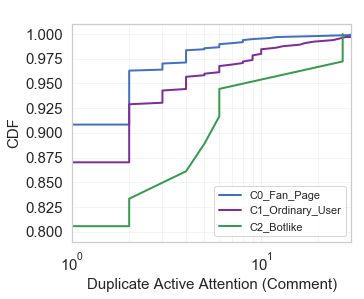

In [36]:
# 
def plot_1():
    
    def get_duplicate_count_per_impersonator(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):

            list_text = group['comment_text'].tolist()
            #find duplicated
            duplicated = Counter(list_text)

            dup = 0
            for item in duplicated:
                if duplicated[item] > 1:
                    dup += duplicated[item]

            list_res.append(dup)

        return list_res
    
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_duplicate_count_per_impersonator(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter], c=COLORS_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,30])
    ax.axes.set_ylim([0.79,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Duplicate Active Attention (Comment)")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning18_P1.pdf", bbox_inches='tight')
    
plot_1()

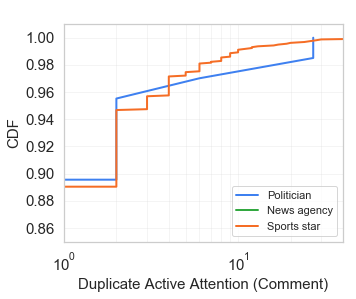

In [34]:
# 
def plot_2():
    
    def get_duplicate_count_per_impersonator(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):

            list_text = group['comment_text'].tolist()
            #find duplicated
            duplicated = Counter(list_text)

            dup = 0
            for item in duplicated:
                if duplicated[item] > 1:
                    dup += duplicated[item]

            list_res.append(dup)

        return list_res
    
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_duplicate_count_per_impersonator(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter], c=COLORS_COMMUNITIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,40])
    ax.axes.set_ylim([0.85,1.01])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Duplicate Active Attention (Comment)")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
    
    plt.savefig("plot_MLearning18_P2.pdf", bbox_inches='tight')
    
plot_2()

In [23]:
from numpy import median

def get_duplicate_count_per_impersonator_remove_zero(_df):
    list_res = []
    for name, group in _df.groupby('owener_id'):

        list_text = group['comment_text'].tolist()
        #find duplicated
        duplicated = Counter(list_text)

        dup = 0
        for item in duplicated:
            if duplicated[item] > 1:
                dup += duplicated[item]

        if (dup != 0):
            list_res.append(dup)

    return list_res


print(median(get_duplicate_count_per_impersonator_remove_zero(df_c0_comments)))
print(median(get_duplicate_count_per_impersonator_remove_zero(df_c1_comments)))
print(median(get_duplicate_count_per_impersonator_remove_zero(df_c2_comments)))

print()

print(median(get_duplicate_count_per_impersonator_remove_zero(df_comment_politician)))
print(median(get_duplicate_count_per_impersonator_remove_zero(df_comment_newsagency)))
print(median(get_duplicate_count_per_impersonator_remove_zero(df_comment_sportstar)))

2.0
3.0
5.0

2.0
nan


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.0


In [24]:
def get_duplicate_df(_df):
    list_res = []

    _df['comment_text_is_duplicated']= _df.duplicated(subset=['comment_text'], keep=False)
    dup = _df[_df['comment_text_is_duplicated'] == True]
    nondup = _df[_df['comment_text_is_duplicated'] == False]

    return dup, nondup

c0_dup, c0_nondup = get_duplicate_df(df_c0_comments)
c1_dup, c1_nondup = get_duplicate_df(df_c1_comments)
c2_dup, c2_nondup = get_duplicate_df(df_c2_comments)

In [25]:
c0_dup.shape[0]

775

In [26]:
a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
print(counter)
for i in counter:
    if (counter[i] > 1):
        print(counter[i])

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
4
4
2
2


In [27]:
# for name, group in c0_dup.groupby('owener_id'):
    
#     group['comment_text_is_duplicated']= group.duplicated(subset=['comment_text'], keep=False)
#     print(group['comment_age_sec'])

#     counter = collections.Counter(group['comment_age_sec'])
#     _sum = 0
#     for i in counter:
#         if (counter[i] > 1):
#             _sum += counter[i]
    
#     print(_sum)
#     print("--------")

In [28]:
c0_dup.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'username', 'name', 'bio', 'photo',
       'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee',
       'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class',
       'class BGM 3', 'class GM 3', 'class kmeans 3', 'class spectral 3',
       'class GM 4', 'owener_id', 'combined_owener_external_url',
       'combined_username', 'combined_full_name', 'combined_profile_pic_url',
       'combined_biography', 'combined_similarity_photo_comment',
       'combined_similarity_photo_like', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'like_total', 'like_shortcode_username',
       'like_post_shortcode', 'like_id', 'comment_post_date',
       'comment_avg_age_sec', 'comment_age_sec', 'community', 'cluster',
       'comment_text_is_duplicated'],
      dtype='object')

In [29]:
c2_dup[['combined_username', 'comment_text', 'comment_created_at', 'comment_post_date', 'comment_age_sec']].head()
# c2_dup['comment_text'].tolist()

combined_username                                       comment_text  \
28       adele201030  To Paradise and the Blessings, and to meet him...   
29       adele201030  The USA/world" shall cherish you for eternitie...   
42    trump_for_ever  Our warm condolences to the dead and these cri...   
44    trump_for_ever  Our warm condolences to the dead and these cri...   
50    trump_for_ever  To Paradise and the Blessings, and to meet him...   

     comment_created_at    comment_post_date  comment_age_sec  
28  2018-10-24 10:15:31  2018-10-23 21:56:33          44338.0  
29  2018-10-14 07:36:45  2018-10-13 22:15:31          33674.0  
42  2018-10-28 18:50:49  2018-10-28 15:54:13          10596.0  
44  2018-10-27 22:51:01  2018-10-27 22:08:54           2527.0  
50  2018-10-26 15:42:34  2018-10-26 15:14:25           1689.0

comment age issued by impersonator across clusters


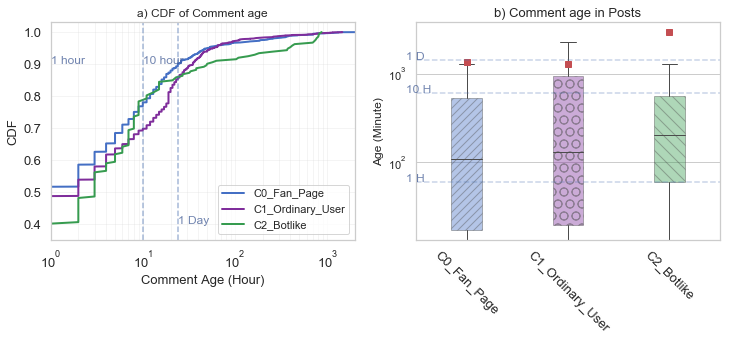

In [30]:
def plot_7():
    
    sns.set(style="whitegrid")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    ALL_DF_COMMENT = [
                    df_c0_comments, 
                          df_c1_comments, 
                          df_c2_comments
                 ]
    

    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=LIST_CLUSTERS[j], c=COLORS_CLUSTERS[j])
            
            df_boxplot[LIST_CLUSTERS[j]] = datam2['period']


    ax5.axes.set_xlim([1,2000])
    ax5.axes.set_ylim([0.35, 1.03])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=-45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor(COLORS_CLUSTERS[j])
        mybox.set_alpha(0.4)
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning13_P7.pdf", bbox_inches='tight')
    
    print("comment age issued by impersonator across clusters")
    
plot_7()

# Text analysis

In [31]:
def clean_text(_row):
    
    # Load the regular expression library
    import re
    
    text = _row['comment_text']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['comment_text_clean'] = text
        
    return _row


df_c0_comments = df_c0_comments.apply(clean_text, axis=1)
df_c1_comments = df_c1_comments.apply(clean_text, axis=1)
df_c2_comments = df_c2_comments.apply(clean_text, axis=1)


df_comment_politician = df_comment_politician.apply(clean_text, axis=1)
df_comment_newsagency = df_comment_newsagency.apply(clean_text, axis=1)
df_comment_sportstar = df_comment_sportstar.apply(clean_text, axis=1)

df_comments = df_comments.apply(clean_text, axis=1)